# 1. Tokenizing

By tokenizing, you can conveniently split up text by word or by sentence. This will allow you to work with smaller pieces of text that are still relatively coherent and meaningful even outside of the context of the rest of the text. It’s your first step in turning unstructured data into structured data, which is easier to analyze.

When you’re analyzing text, you’ll be tokenizing by word and tokenizing by sentence. Here’s what both types of tokenization bring to the table:

- Tokenizing by word: Words are like the atoms of natural language. They’re the smallest unit of meaning that still makes sense on its own. Tokenizing your text by word allows you to identify words that come up particularly often. For example, if you were analyzing a group of job ads, then you might find that the word “Python” comes up often. That could suggest high demand for Python knowledge, but you’d need to look deeper to know more.

- Tokenizing by sentence: When you tokenize by sentence, you can analyze how those words relate to one another and see more context. Are there a lot of negative words around the word “Python” because the hiring manager doesn’t like Python? Are there more terms from the domain of herpetology than the domain of software development, suggesting that you may be dealing with an entirely different kind of python than you were expecting?

In [42]:
from nltk.tokenize import sent_tokenize, word_tokenize

example_string = """ Muad'Dib learned rapidly because his first training was in how to learn. And the first lesson of all was the basic trust that he could learn. It's shocking to find how many people do not believe they can learn, and how many more believe learning to be difficult."""
sent_tokenize(example_string)

[" Muad'Dib learned rapidly because his first training was in how to learn.",
 'And the first lesson of all was the basic trust that he could learn.',
 "It's shocking to find how many people do not believe they can learn, and how many more believe learning to be difficult."]

In [43]:
word_tokenize(example_string)

["Muad'Dib",
 'learned',
 'rapidly',
 'because',
 'his',
 'first',
 'training',
 'was',
 'in',
 'how',
 'to',
 'learn',
 '.',
 'And',
 'the',
 'first',
 'lesson',
 'of',
 'all',
 'was',
 'the',
 'basic',
 'trust',
 'that',
 'he',
 'could',
 'learn',
 '.',
 'It',
 "'s",
 'shocking',
 'to',
 'find',
 'how',
 'many',
 'people',
 'do',
 'not',
 'believe',
 'they',
 'can',
 'learn',
 ',',
 'and',
 'how',
 'many',
 'more',
 'believe',
 'learning',
 'to',
 'be',
 'difficult',
 '.']

# 2. Filtering Stop Words

Stop words are words that you want to ignore, so you filter them out of your text when you’re processing it. Very common words like 'in', 'is', and 'an' are often used as stop words since they don’t add a lot of meaning to a text in and of themselves.

In [44]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thanh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
worf_quote = "Sir, I protest. I am not a merry man!"

In [46]:
word_in_quotes = word_tokenize(worf_quote)
word_in_quotes

['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']

In [47]:
stop_words = set(stopwords.words("english"))

In [48]:
filtered_list = []
for word in word_in_quotes:
    if word.casefold() not in stop_words:
        filtered_list.append(word)

In [49]:
filtered_lists = [word for word in word_in_quotes if word.casefold() not in stop_words]

In [50]:
filtered_list

['Sir', ',', 'protest', '.', 'merry', 'man', '!']

# 3. Stemming

Stemming is a text processing task in which you reduce words to their root, which is the core part of a word. For example, the words “helping” and “helper” share the root “help.” Stemming allows you to zero in on the basic meaning of a word rather than all the details of how it’s being used. NLTK has more than one stemmer, but you’ll be using the Porter stemmer.

In [51]:
from nltk.stem import PorterStemmer, SnowballStemmer

stemmer = PorterStemmer()
stemmer2 = SnowballStemmer("english")

In [52]:
string_for_stemming = """The crew of the USS Discovery discovered many discoveries. Discovering is what explorers do."""

In [53]:
words = word_tokenize(string_for_stemming)

In [54]:
stemmed_words = [stemmer.stem(word) for word in words]

In [55]:
stemmed_words

['the',
 'crew',
 'of',
 'the',
 'uss',
 'discoveri',
 'discov',
 'mani',
 'discoveri',
 '.',
 'discov',
 'is',
 'what',
 'explor',
 'do',
 '.']

In [56]:
stemmed_words2 = [stemmer2.stem(word) for word in words]

In [57]:
stemmed_words2

['the',
 'crew',
 'of',
 'the',
 'uss',
 'discoveri',
 'discov',
 'mani',
 'discoveri',
 '.',
 'discov',
 'is',
 'what',
 'explor',
 'do',
 '.']

Those results look a little inconsistent. Why would 'Discovery' give you 'discoveri' when 'Discovering' gives you 'discov'?

Understemming and overstemming are two ways stemming can go wrong:

1. Understemming happens when two related words should be reduced to the same stem but aren’t. This is a false negative.
2. Overstemming happens when two unrelated words are reduced to the same stem even though they shouldn’t be. This is a false positive.
The Porter stemming algorithm dates from 1979, so it’s a little on the older side. The Snowball stemmer, which is also called Porter2, is an improvement on the original and is also available through NLTK, so you can use that one in your own projects. It’s also worth noting that the purpose of the Porter stemmer is not to produce complete words but to find variant forms of a word.

Fortunately, you have some other ways to reduce words to their core meaning, such as lemmatizing, which you’ll see later in this tutorial. But first, we need to cover parts of speech.

# 4. Tagging Parts of Speech

Part of speech is a grammatical term that deals with the roles words play when you use them together in sentences. Tagging parts of speech, or POS tagging, is the task of labeling the words in your text according to their part of speech.

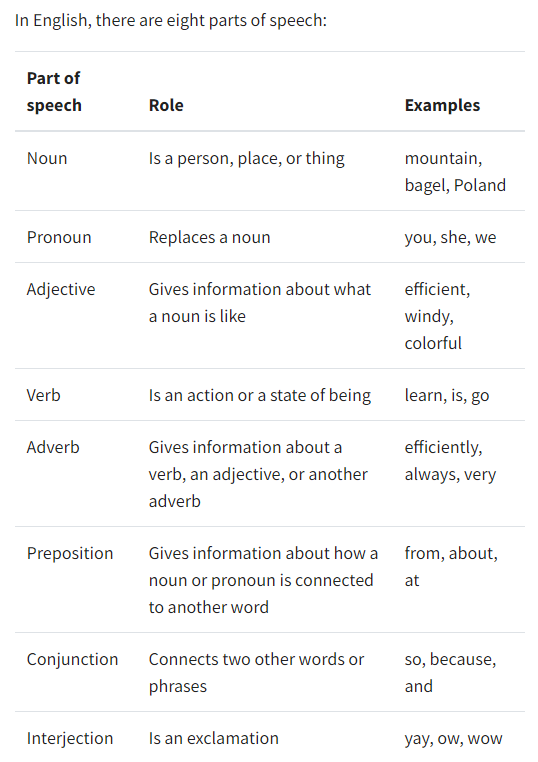

In [58]:
from nltk.tokenize import word_tokenize

sagan_quote = """If you wish to make an apple pie from scratch, you must first invent the universe."""
words_in_sagan_quote = word_tokenize(sagan_quote)

import nltk
nltk.download("averaged_perceptron_tagger")
nltk.pos_tag(words_in_sagan_quote)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\thanh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('If', 'IN'),
 ('you', 'PRP'),
 ('wish', 'VBP'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('an', 'DT'),
 ('apple', 'NN'),
 ('pie', 'NN'),
 ('from', 'IN'),
 ('scratch', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('must', 'MD'),
 ('first', 'VB'),
 ('invent', 'VB'),
 ('the', 'DT'),
 ('universe', 'NN'),
 ('.', '.')]

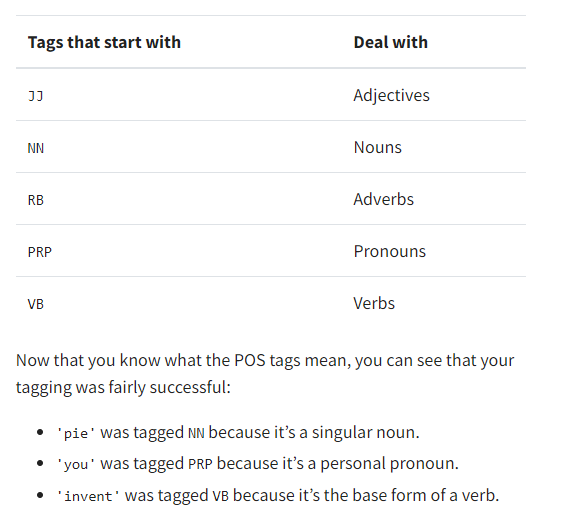

In [59]:
jabberwocky = """'Twas brillig, and the slithy toves did gyre and gimble in the wabe; All mimsy were the borogoves, and the mome raths outgrabe."""

words_in_jabberwocky = word_tokenize(jabberwocky)
nltk.pos_tag(words_in_jabberwocky)

[("'T", 'NN'),
 ('was', 'VBD'),
 ('brillig', 'VBN'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('slithy', 'JJ'),
 ('toves', 'NNS'),
 ('did', 'VBD'),
 ('gyre', 'NN'),
 ('and', 'CC'),
 ('gimble', 'JJ'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('wabe', 'NN'),
 (';', ':'),
 ('All', 'DT'),
 ('mimsy', 'NNS'),
 ('were', 'VBD'),
 ('the', 'DT'),
 ('borogoves', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('mome', 'JJ'),
 ('raths', 'NNS'),
 ('outgrabe', 'RB'),
 ('.', '.')]

# 5. Lemmatizing
----
Now that you’re up to speed on parts of speech, you can circle back to lemmatizing. Like stemming, lemmatizing reduces words to their core meaning, but it will give you a complete English word that makes sense on its own instead of just a fragment of a word like 'discoveri'.

Note: A lemma is a word that represents a whole group of words, and that group of words is called a lexeme.

For example, if you were to look up the word “blending” in a dictionary, then you’d need to look at the entry for “blend,” but you would find “blending” listed in that entry.

In this example, “blend” is the lemma, and “blending” is part of the lexeme. So when you lemmatize a word, you are reducing it to its lemma.

In [60]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')


r1 = lemmatizer.lemmatize("scarves")
r2 = stemmer.stem("scarves")
print(r1)
print(r2)

scarf
scarv


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thanh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [61]:
string_for_lemmatizing = """The friends of DeSoto love scarves. They have many scarves for their necks."""
words = word_tokenize(string_for_lemmatizing)
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
lemmatized_words

['The',
 'friend',
 'of',
 'DeSoto',
 'love',
 'scarf',
 '.',
 'They',
 'have',
 'many',
 'scarf',
 'for',
 'their',
 'neck',
 '.']

In [62]:
lemmatizer.lemmatize("worst")

'worst'

In [63]:
lemmatizer.lemmatize("worst", pos = "a")
# pos = "a" is for adjective, n is for noun, v is for verb, r is for adverb

'bad'

# 6. Chunking
---
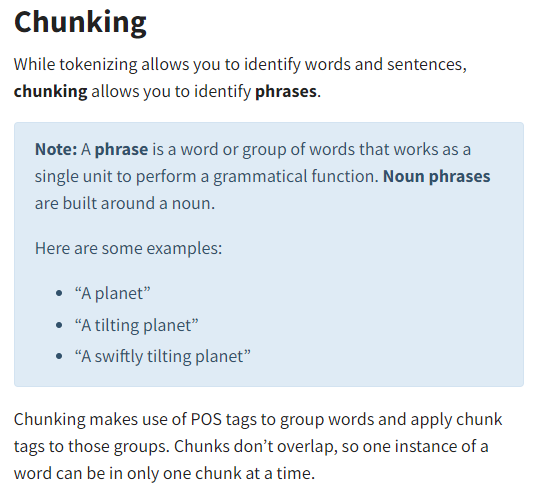

In [64]:
from nltk.tokenize import word_tokenize
lotr_quote = """It's a dangerous business, Frodo, going out your door."""
words_in_lotr_quote = word_tokenize(lotr_quote)
words_in_lotr_quote

['It',
 "'s",
 'a',
 'dangerous',
 'business',
 ',',
 'Frodo',
 ',',
 'going',
 'out',
 'your',
 'door',
 '.']

In [65]:
nltk.download("averaged_perceptron_tagger")
lotr_pos_tags = nltk.pos_tag(words_in_lotr_quote)
lotr_pos_tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\thanh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('dangerous', 'JJ'),
 ('business', 'NN'),
 (',', ','),
 ('Frodo', 'NNP'),
 (',', ','),
 ('going', 'VBG'),
 ('out', 'RP'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('.', '.')]

In [66]:
grammar = "NP: {<DT>?<JJ>*<NN>}"
churn_parser = nltk.RegexpParser(grammar)

In [67]:
tree = churn_parser.parse(lotr_pos_tags)

Dĩ nhiên, mình sẽ giải thích bằng tiếng Việt và kèm theo ví dụ để dễ hiểu hơn.

Trong ngôn ngữ tự nhiên, một câu có thể được phân tích thành các phần nhỏ hơn như cụm từ hoặc từ loại để hiểu ý nghĩa của nó. Trong tiếng Anh, ví dụ, một câu có thể được chia thành các thành phần như danh từ (Noun - N), động từ (Verb - V), tính từ (Adjective - ADJ), và nhiều hơn nữa.

Trong tiếng Việt, chúng ta cũng có thể phân tích câu thành các phần nhỏ hơn để hiểu cấu trúc và ý nghĩa của câu đó. Ví dụ, câu "Con chó đen nhảy qua cái cầu." có thể được phân tích thành các thành phần như sau:

- "Con chó đen": cụm danh từ mô tả con chó có màu đen.
- "nhảy qua": động từ mô tả hành động của con chó.
- "cái cầu": danh từ chỉ đối tượng mà con chó nhảy qua.

Trong ví dụ này, cụm từ "Con chó đen" là một danh từ phức tạp, được hình thành từ danh từ "chó" và tính từ "đen".

Giống như vậy, trong mã bạn cung cấp, bạn đang sử dụng một cú pháp để xác định các cụm từ danh từ trong câu dựa trên cấu trúc của chúng. Ví dụ, trong cú pháp `"NP: {<DT>?<JJ>*<NN>}"`, `NP` đại diện cho cụm từ danh từ (Noun Phrase), và các ký tự trong ngoặc nhọn định nghĩa cấu trúc của cụm từ danh từ:

- `<DT>`: một từ chỉ định (Determiner), như "the", "a", "an".
- `?`: có thể có hoặc không có một từ chỉ định.
- `<JJ>`: một tính từ (Adjective), như "big", "beautiful".
- `*`: có thể có hoặc không có một hoặc nhiều tính từ.
- `<NN>`: một danh từ (Noun), như "dog", "car".

Vậy nên, khi bạn sử dụng `churn_parser` với câu văn đầu vào, nó sẽ cố gắng tìm và phân tích các cụm từ danh từ trong câu dựa trên cấu trúc bạn đã xác định.

# 7. Chinking
---
Chinking is used together with chunking, but while chunking is used to include a pattern, chinking is used to exclude a pattern.

In [68]:
lotr_pos_tags

[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('dangerous', 'JJ'),
 ('business', 'NN'),
 (',', ','),
 ('Frodo', 'NNP'),
 (',', ','),
 ('going', 'VBG'),
 ('out', 'RP'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('.', '.')]

In [69]:
grammar = """
Chunk: {<.*>+}
       }<JJ>{"""

chunk_parser = nltk.RegexpParser(grammar)

In [70]:
tree = chunk_parser.parse(lotr_pos_tags)

# 8. Using Name Entity Recognition (NER)
---
Named entities are noun phrases that refer to specific locations, people, organizations, and so on. With named entity recognition, you can find the named entities in your texts and also determine what kind of named entity they are.

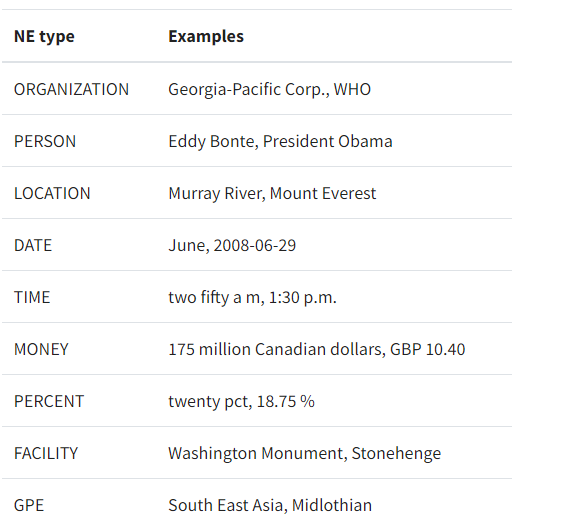

In [71]:
nltk.download("maxent_ne_chunker")
nltk.download("words")
tree = nltk.ne_chunk(lotr_pos_tags)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\thanh\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\thanh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [72]:
# See how Frodo has been tagged as a PERSON? You also have the option to use the parameter binary=True if you just want to know what the named entities are but not what kind of named entity they are:
tree = nltk.ne_chunk(lotr_pos_tags, binary=True)

In [73]:
quote = """
Men like Schiaparelli watched the red planet—it is odd, by-the-bye, that
for countless centuries Mars has been the star of war—but failed to
interpret the fluctuating appearances of the markings they mapped so well.
All that time the Martians must have been getting ready.

During the opposition of 1894 a great light was seen on the illuminated
part of the disk, first at the Lick Observatory, then by Perrotin of Nice,
and then by other observers. English readers heard of it first in the
issue of Nature dated August 2."""

In [74]:
from nltk.tokenize import sent_tokenize, word_tokenize
sentences = sent_tokenize(quote)
words = word_tokenize(quote)

In [75]:
sentences

['\nMen like Schiaparelli watched the red planet—it is odd, by-the-bye, that\nfor countless centuries Mars has been the star of war—but failed to\ninterpret the fluctuating appearances of the markings they mapped so well.',
 'All that time the Martians must have been getting ready.',
 'During the opposition of 1894 a great light was seen on the illuminated\npart of the disk, first at the Lick Observatory, then by Perrotin of Nice,\nand then by other observers.',
 'English readers heard of it first in the\nissue of Nature dated August 2.']

In [76]:
words

['Men',
 'like',
 'Schiaparelli',
 'watched',
 'the',
 'red',
 'planet—it',
 'is',
 'odd',
 ',',
 'by-the-bye',
 ',',
 'that',
 'for',
 'countless',
 'centuries',
 'Mars',
 'has',
 'been',
 'the',
 'star',
 'of',
 'war—but',
 'failed',
 'to',
 'interpret',
 'the',
 'fluctuating',
 'appearances',
 'of',
 'the',
 'markings',
 'they',
 'mapped',
 'so',
 'well',
 '.',
 'All',
 'that',
 'time',
 'the',
 'Martians',
 'must',
 'have',
 'been',
 'getting',
 'ready',
 '.',
 'During',
 'the',
 'opposition',
 'of',
 '1894',
 'a',
 'great',
 'light',
 'was',
 'seen',
 'on',
 'the',
 'illuminated',
 'part',
 'of',
 'the',
 'disk',
 ',',
 'first',
 'at',
 'the',
 'Lick',
 'Observatory',
 ',',
 'then',
 'by',
 'Perrotin',
 'of',
 'Nice',
 ',',
 'and',
 'then',
 'by',
 'other',
 'observers',
 '.',
 'English',
 'readers',
 'heard',
 'of',
 'it',
 'first',
 'in',
 'the',
 'issue',
 'of',
 'Nature',
 'dated',
 'August',
 '2',
 '.']

In [77]:
nltk.download("averaged_perceptron_tagger")
words_pos_tags = nltk.pos_tag(words)
words_pos_tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\thanh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Men', 'NNS'),
 ('like', 'IN'),
 ('Schiaparelli', 'NNP'),
 ('watched', 'VBD'),
 ('the', 'DT'),
 ('red', 'JJ'),
 ('planet—it', 'NN'),
 ('is', 'VBZ'),
 ('odd', 'JJ'),
 (',', ','),
 ('by-the-bye', 'JJ'),
 (',', ','),
 ('that', 'IN'),
 ('for', 'IN'),
 ('countless', 'JJ'),
 ('centuries', 'NNS'),
 ('Mars', 'NNP'),
 ('has', 'VBZ'),
 ('been', 'VBN'),
 ('the', 'DT'),
 ('star', 'NN'),
 ('of', 'IN'),
 ('war—but', 'NN'),
 ('failed', 'VBD'),
 ('to', 'TO'),
 ('interpret', 'VB'),
 ('the', 'DT'),
 ('fluctuating', 'NN'),
 ('appearances', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('markings', 'NNS'),
 ('they', 'PRP'),
 ('mapped', 'VBD'),
 ('so', 'RB'),
 ('well', 'RB'),
 ('.', '.'),
 ('All', 'PDT'),
 ('that', 'DT'),
 ('time', 'NN'),
 ('the', 'DT'),
 ('Martians', 'NNPS'),
 ('must', 'MD'),
 ('have', 'VB'),
 ('been', 'VBN'),
 ('getting', 'VBG'),
 ('ready', 'JJ'),
 ('.', '.'),
 ('During', 'IN'),
 ('the', 'DT'),
 ('opposition', 'NN'),
 ('of', 'IN'),
 ('1894', 'CD'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('light', 

In [78]:
nltk.download("maxent_ne_chunker")
nltk.download("words")
tree = nltk.ne_chunk(words_pos_tags)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\thanh\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\thanh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [79]:
quote = """
Men like Schiaparelli watched the red planet—it is odd, by-the-bye, that
for countless centuries Mars has been the star of war—but failed to
interpret the fluctuating appearances of the markings they mapped so well.
All that time the Martians must have been getting ready.

During the opposition of 1894 a great light was seen on the illuminated
part of the disk, first at the Lick Observatory, then by Perrotin of Nice,
and then by other observers. English readers heard of it first in the
issue of Nature dated August 2."""

In [80]:
import nltk
from nltk import word_tokenize, ne_chunk
from nltk.chunk import tree2conlltags

def extract_ne(quote):
    words = word_tokenize(quote)
    words_pos_tags = nltk.pos_tag(words)
    tree = ne_chunk(words_pos_tags, binary=True)
    ne = set()
    for subtree in tree:
        if isinstance(subtree, nltk.Tree):
            ne.add(" ".join([token for token, pos, chunk in tree2conlltags(subtree) if chunk == 'B-NE' or chunk == 'I-NE']))
    return ne
print(extract_ne(quote))


{''}


# 9. Getting Text to Analyze
---
Now that you’ve done some text processing tasks with small example texts, you’re ready to analyze a bunch of texts at once. A group of texts is called a corpus.

In [81]:
nltk.download("book")
from nltk.book import *
texts()

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\thanh\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\thanh\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\thanh\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\thanh\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\thanh\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\conll2000.zip.
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\thanh\AppData\Roaming\nltk_data...
[nltk_data]    |   U

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [82]:
sents()

sent1: Call me Ishmael .
sent2: The family of Dashwood had long been settled in Sussex .
sent3: In the beginning God created the heaven and the earth .
sent4: Fellow - Citizens of the Senate and of the House of Representatives :
sent5: I have a problem with people PMing me to lol JOIN
sent6: SCENE 1 : [ wind ] [ clop clop clop ] KING ARTHUR : Whoa there !
sent7: Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 .
sent8: 25 SEXY MALE , seeks attrac older single lady , for discreet encounters .
sent9: THE suburb of Saffron Park lay on the sunset side of London , as red and ragged as a cloud of sunset .


# 10. Using a Concordance
---
When you use a concordance, you can see each time a word is used, along with its immediate context. This can give you a peek into how a word is being used at the sentence level and what words are used with it.

In [83]:
print(text8)

<Text: Personals Corpus>


In [84]:
text8.concordance("man")

Displaying 14 of 14 matches:
 to hearing from you all . ABLE young man seeks , sexy older women . Phone for 
ble relationship . GENUINE ATTRACTIVE MAN 40 y . o ., no ties , secure , 5 ft .
ship , and quality times . VIETNAMESE MAN Single , never married , financially 
ip . WELL DRESSED emotionally healthy man 37 like to meet full figured woman fo
 nth subs LIKE TO BE MISTRESS of YOUR MAN like to be treated well . Bold DTE no
eeks lady in similar position MARRIED MAN 50 , attrac . fit , seeks lady 40 - 5
eks nice girl 25 - 30 serious rship . Man 46 attractive fit , assertive , and k
 40 - 50 sought by Aussie mid 40s b / man f / ship r / ship LOVE to meet widowe
discreet times . Sth E Subs . MARRIED MAN 42yo 6ft , fit , seeks Lady for discr
woman , seeks professional , employed man , with interests in theatre , dining 
 tall and of large build seeks a good man . I am a nonsmoker , social drinker ,
lead to relationship . SEEKING HONEST MAN I am 41 y . o ., 5 ft . 4 , med . bui
 quiet time

In [85]:
text8.concordance("woman")

Displaying 11 of 11 matches:
at home . Seeking an honest , caring woman , slim or med . build , who enjoys t
thy man 37 like to meet full figured woman for relationship . 48 slim , shy , S
rry . MALE 58 years old . Is there a Woman who would like to spend 1 weekend a 
 other interests . Seeking Christian Woman for fship , view to rship . SWM 45 D
ALE 60 - burly beared seeks intimate woman for outings n / s s / d F / ston / P
ington . SCORPIO 47 seeks passionate woman for discreet intimate encounters SEX
le dad . 42 , East sub . 5 " 9 seeks woman 30 + for f / ship relationship TALL 
personal trainer looking for married woman age open for fun MARRIED Dark guy 37
rinker , seeking slim - medium build woman who is happy in life , age open . AC
. O . TERTIARY Educated professional woman , seeks professional , employed man 
 real romantic , age 50 - 65 y . o . WOMAN OF SUBSTANCE 56 , 59 kg ., 50 , fit 


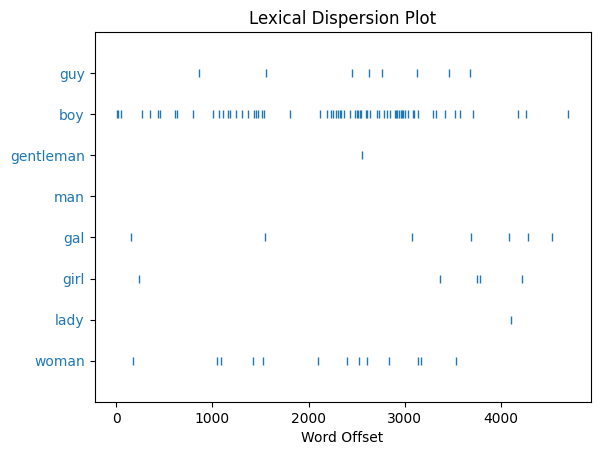

In [86]:
# making a dispersion plot
# You can use a dispersion plot to see how much a particular word appears and where it appears. So far, we’ve looked for "man" and "woman", but it would be interesting to see how much those words are used compared to their synonyms:
text8.dispersion_plot(
    ["woman", "lady", "girl", "gal", "man", "gentleman", "boy", "guy"]
)

You use a dispersion plot when you want to see where words show up in a text or corpus. If you’re analyzing a single text, this can help you see which words show up near each other. If you’re analyzing a corpus of texts that is organized chronologically, it can help you see which words were being used more or less over a period of time.

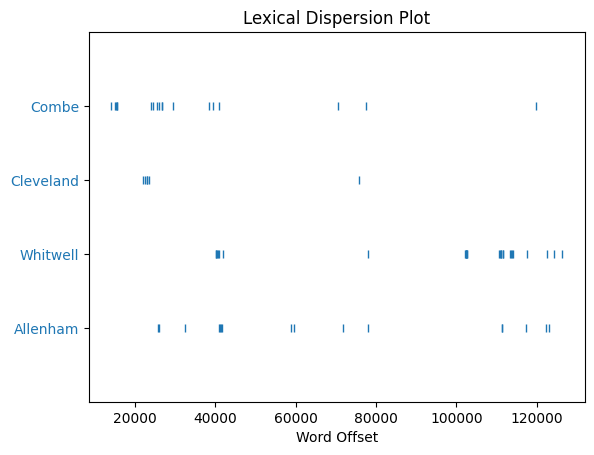

In [87]:
text2.dispersion_plot(["Allenham", "Whitwell", "Cleveland", "Combe"])

Apparently Allenham is mentioned a lot in the first third of the novel and then doesn’t come up much again. Cleveland, on the other hand, barely comes up in the first two thirds but shows up a fair bit in the last third. This distribution reflects changes in the relationship between Marianne and Willoughby:

- Allenham is the home of Willoughby’s benefactress and comes up a lot when Marianne is first interested in him.
- Cleveland is a home that Marianne stays at after she goes to see Willoughby in London and things go wrong.
Dispersion plots are just one type of visualization you can make for textual data. The next one you’ll take a look at is frequency distributions.

# 11. Making a Frequency Distribution
----
With a frequency distribution, you can check which words show up most frequently in your text. 

In [88]:
from nltk import FreqDist
frequency_distribution = FreqDist(text8)
print(frequency_distribution)

<FreqDist with 1108 samples and 4867 outcomes>


In [89]:
frequency_distribution.most_common(10)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('for', 99),
 ('and', 74),
 ('to', 74),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('a', 52)]

In [90]:
meaningful_words = [word for word in text8 if word.casefold not in stop_words and word.isalpha()]
meaningful_words

['SEXY',
 'MALE',
 'seeks',
 'attrac',
 'older',
 'single',
 'lady',
 'for',
 'discreet',
 'encounters',
 'Security',
 'Guard',
 'seeking',
 'lady',
 'in',
 'uniform',
 'for',
 'fun',
 'times',
 'yo',
 'SINGLE',
 'DAD',
 'sincere',
 'friendly',
 'DTE',
 'seeks',
 'r',
 'ship',
 'with',
 'fem',
 'age',
 'open',
 'S',
 'E',
 'tall',
 'seeks',
 'working',
 'single',
 'mum',
 'or',
 'lady',
 'below',
 'fship',
 'rship',
 'Nat',
 'Open',
 'yr',
 'old',
 'OUTGOING',
 'M',
 'seeks',
 'fem',
 'for',
 'o',
 'door',
 'sports',
 'w',
 'e',
 'away',
 'A',
 'professional',
 'business',
 'male',
 'late',
 'feet',
 'tall',
 'slim',
 'build',
 'well',
 'groomed',
 'great',
 'personality',
 'home',
 'owner',
 'interests',
 'include',
 'the',
 'arts',
 'travel',
 'and',
 'all',
 'things',
 'good',
 'Ringwood',
 'area',
 'is',
 'seeking',
 'a',
 'genuine',
 'female',
 'of',
 'similar',
 'age',
 'or',
 'older',
 'in',
 'same',
 'area',
 'or',
 'surrounds',
 'for',
 'a',
 'meaningful',
 'long',
 'term',
 '

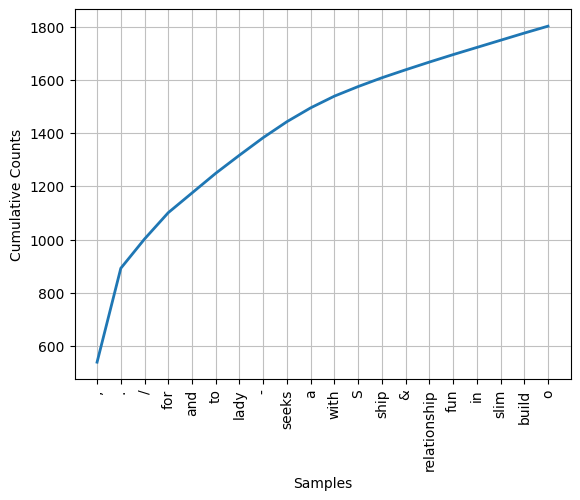

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [91]:
frequency_distribution.plot(20, cumulative=True)

From what you’ve already learned about the people writing these personals ads, they did seem interested in honesty and used the word 'lady' a lot. In addition, 'slim' and 'build' both show up the same number of times. You saw slim and build used near each other when you were learning about concordances, so maybe those two words are commonly used together in this corpus. That brings us to collocations!

# 12. Finding Collocations
---
A collocation is a sequence of words that shows up often.

In [92]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


In [93]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in words] 
new_text = nltk.Text(lemmatized_words)
print(new_text.collocations())


None
